# Left and right point Riemann sums

_MATH 202_ 

_fall 2021_

Here are two Julia language functions that evaluate the left and right point Riemann sums. 


In [1]:
function left_point_sum(F::Function,a::Number,b::Number,n::Integer) 
   if n <= 0
      throw(ArgumentError("Number of subdivisions n must be greater than 0."))
  end

   s = zero(a) # initialize accumlator to zero
   h = (b-a)/n # step size
   k = 0 # loop counter
   while k < n
        s += F(fma(h,k,a)) # fma(h,k,a) = a+h*k
        k += 1
   end
   h*s
end

left_point_sum (generic function with 1 method)

In [2]:
function right_point_sum(F::Function,a::Number,b::Number,n::Integer) 
   if n <= 0
      throw(ArgumentError("Number of subdivisions n must be greater than 0."))
  end

   s = zero(a) # initialize accumlator to zero
   h = (b-a)/n # step size
   k = 1  # loop counter
   while k <= n
        s += F(fma(h,k,a))
        k += 1
   end
   h*s
end

right_point_sum (generic function with 1 method)

In [3]:
function trap_sum(F::Function,a::Number,b::Number,n::Integer) 
   if n <= 0
      throw(ArgumentError("Number of subdivisions n must be greater than 0."))
  end

   s = zero(a) # initialize accumlator
   h = (b-a)/n # step size
   k = 1  # loop counter
   while k < n
        s += F(fma(h,k,a))
        k += 1
   end
   h*((F(a) + F(b))/ 2 + s)
end;

In [4]:
using Gadfly

Let's find some left and right point Riemann sums for the function 
$$
F = x \mapsto \sqrt{1+x^4}
$$
We'll start by defining $F$ and drawing its graph.

In [5]:
F = x -> sqrt(1+x^4)

#9 (generic function with 1 method)

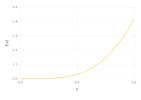

In [6]:
plot(F,0,1,Theme(default_color=color("orange")))

Here are some left and right point sums. Since $F$ is increasing, we should see that the left point sums are less than the right point sums:

In [7]:
[left_point_sum(F,0,1,2^8), right_point_sum(F,0,1,2^8)]

2-element Vector{Float64}:
 1.0886222006263484
 1.0902402223543683

In [8]:
[left_point_sum(F,0,1,2^9), right_point_sum(F,0,1,2^9)]

2-element Vector{Float64}:
 1.0890253573592024
 1.0898343682232123

In [9]:
[left_point_sum(F,0,1,2^10), right_point_sum(F,0,1,2^10)]

2-element Vector{Float64}:
 1.089227272900416
 1.089631778332421

As a function of the number of subintervals, let's graph the left and right point sums

In [10]:
Rl = n -> left_point_sum(F,0,1,convert(Int64, round(n)))

#11 (generic function with 1 method)

In [11]:
Rr =n -> right_point_sum(F,0,1,convert(Int64, round(n)))

#13 (generic function with 1 method)

In [12]:
Rtrap =n -> trap_sum(F,0,1,convert(Int64, round(n)))

#15 (generic function with 1 method)

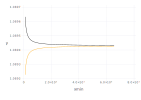

In [13]:
plot(layer(Rl, 2^10, 2^16, Theme(default_color=color("orange"))),
     layer(Rr, 2^10, 2^16, Theme(default_color=color("black"))))

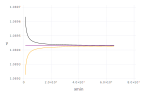

In [14]:
    
plot(layer(Rl, 2^10, 2^16, Theme(default_color=color("orange"))),
     layer(Rtrap, 2^10, 2^16, Theme(default_color=color("purple"))),
     layer(Rr, 2^10, 2^16, Theme(default_color=color("black"))))

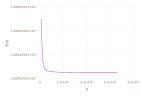

In [15]:
plot(Rtrap, 2^10, 2^16, Theme(default_color=color("purple")))
   